## Comparing Naive Bayes and Linear Discriminant Analysis

Both LDA and Naïve Bayes (NB) are linear classifiers and come under the category of Generative Models which estimates the posterior P(class|x). 

In [17]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


#### Output 1
Here , from the above output we can say that, 6 points were miclassified in the IRIS dataset using Naive Bayes classifier.

The mean and the variance of the Gaussian are estimated from the training patterns. A test pattern x is classified as the class Ci whose posterior probability P(Ci|x) is maximal among all classes. 

NB relies on a less flexible distributional model in that it assumes zero off-diagonal covariance (i.e. no correlations between variables within a class).

In [18]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
gnb = LDA()

y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))


Number of mislabeled points out of a total 150 points : 3


#### Output 2
Here, from the above output we can say that 3 points were misclassified in IRIS dataset using Linear Discriminant Analysis

 An LDA classifier is Bayes-optimal (ignoring estimation error) if the distributions corresponding to the two classes are Gaussian and have equal covariance.

#### Comparison

Using Naive Bayes we assume the features to be independent and by using LDA we assume the covariance to be same for all the classes.

Since we found that for IRIS dataset the number of misclassifies points is more while using Naive Bayes than while using LDA, we can say that IRIS dataset has cl

#### Plotting IRIS data set using LDA

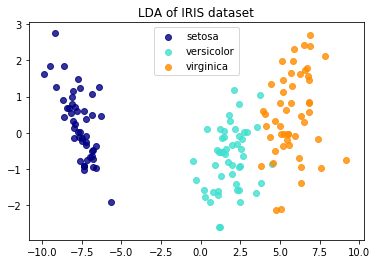

In [25]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)


plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

The above plot shoes how LDA aptly classifies IRIS dataset into classes.

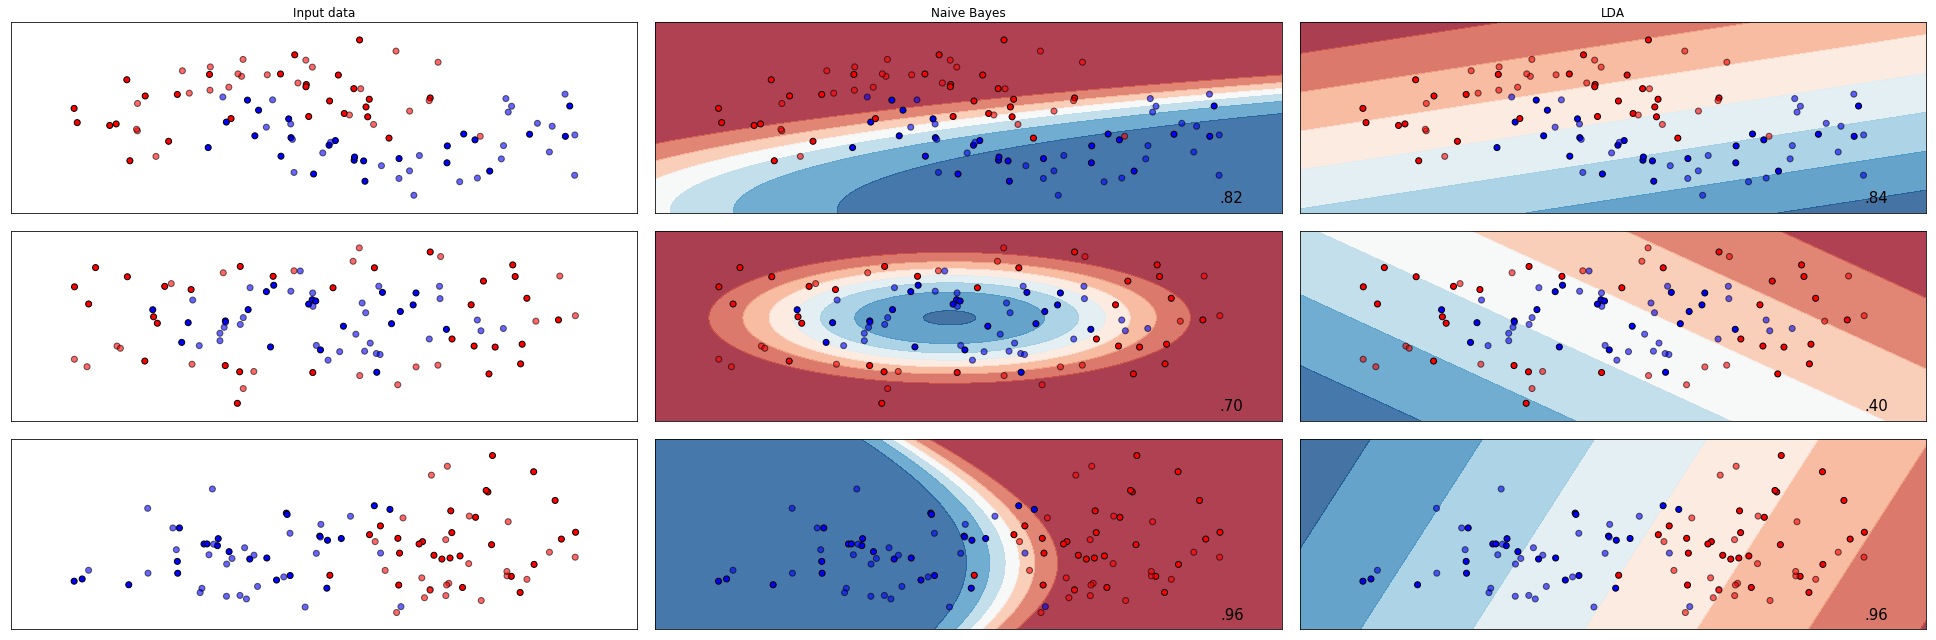

In [27]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Naive Bayes", "LDA"]

classifiers = [GaussianNB(),
    LinearDiscriminantAnalysis()]

X, y = make_classification(n_samples=100,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(n_samples=100,noise=0.3, random_state=0),
            make_circles(n_samples=100,noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.5, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

#### Comparison of Naive Bayes and LDA

make_moons() : Make two interleaving half circles 
As seen for this dataset both LDA and Naive Bayes provide good accuracy of 84 and 82% 

make_circles() : Make a large circle containing a smaller circle in 2d.
As seen for this dataset Naive Bayes acts as a better classifier than LDA as accuracy of NB is 70% while that of LDA is 40%

linearly_seperable:The 2 classes are distinctly seperate here.
As seen for this dataset both the classifiers NB and LDA provide a good 96% accuracy.

#### We can thus conclude following

Naive Bayes
The first disadvantage of the Naive Bayes classifier is the feature independence assumption. In practice, the data is multi-dimensional and different features do correlate. Due to this, the result can be potentially pretty bad, though not always significantly. If you know for sure, that features are dependent (e.g. pixels of an image), don't expect Naive Bayes to show off.

Another problem is data scarcity. For any possible value of a feature, a likelihood is estimated by a frequentist approach. This can result in probabilities being close to 0 or 1, which in turn leads to numerical instabilities and worse results.

A third problem arises for continuous features. The Naive Bayes classifier works only with categorical variables, so one has to transform continuous features to discrete, by which throwing away a lot of information. If there's a continuous variable in the data, it's a strong sign against Naive Bayes.

Linear Discriminant Analysis
The LDA does not work well if the classes are not balanced, i.e. the number of objects in various classes are highly different. The solution is to get more data, which can be pretty easy or almost impossible, depending on a task.

Another disadvantage of LDA is that it's not applicable for non-linear problems, e.g. separation of donut-shape point clouds, but in high dimensional spaces it's hard to spot it right away. Usually you understand this after you see LDA not working, but if the data is known to be very non-linear, this is a strong sign against LDA.
#### The make_circles dataset is an example here.

In addition, LDA can be sensitive to overfitting and need careful validation / testing.